In [13]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Spam dataset\spam_ham_dataset.csv')
df

,Unnamed,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
from sklearn.preprocessing import LabelEncoder

In [6]:
enc = LabelEncoder()
df_num_cat = pd.DataFrame()

df_num_cat['Unnamed'] = enc.fit_transform(df['Unnamed'])
df_num_cat['label'] = enc.fit_transform(df['label'])
df_num_cat['text'] = enc.fit_transform(df['text'])
df_num_cat['label_num'] = enc.fit_transform(df['label_num'])

df_num_cat

,Unnamed,label,text,label_num
0,605,0,1209,0
1,2349,0,1985,0
2,3624,0,2774,0
3,4685,1,3158,1
4,2030,0,3613,0
...,...,...,...,...
5166,1518,0,3254,0
5167,404,0,125,0
5168,2933,0,495,0
5169,1409,0,2223,0


In [7]:
X = df_num_cat.drop(['label_num'],axis=1)
y = df_num_cat['label_num']
print(X)
print(y)

      Unnamed  label  text
0         605      0  1209
1        2349      0  1985
2        3624      0  2774
3        4685      1  3158
4        2030      0  3613
...       ...    ...   ...
5166     1518      0  3254
5167      404      0   125
5168     2933      0   495
5169     1409      0  2223
5170     4807      1  2195

[5171 rows x 3 columns]
0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [9]:
dt_clf.score(X,y)

1.0

In [16]:
y_pred = dt_clf.predict(X)
print(y)
print(y_pred)

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64
[0 0 0 ... 0 0 1]


[Text(0.5, 0.75, 'X[0] <= 3671.5\nentropy = 0.869\nsamples = 5171\nvalue = [3672, 1499]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 3672\nvalue = [3672, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 1499\nvalue = [0, 1499]')]

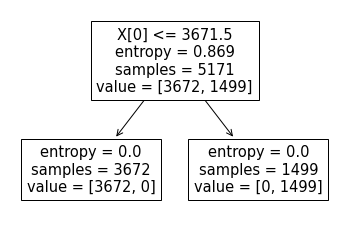

In [14]:
from sklearn import tree
tree.plot_tree(dt_clf)

In [17]:
import sklearn.metrics

lbs = [0,1]

CF = sklearn.metrics.confusion_matrix(y, y_pred,labels=lbs)
acc = sklearn.metrics.accuracy_score(y, y_pred)
p = sklearn.metrics.precision_score(y, y_pred, labels=lbs, pos_label=0)
r = sklearn.metrics.recall_score(y, y_pred, labels=lbs,pos_label=0)
f1 = sklearn.metrics.f1_score(y, y_pred, labels=lbs,pos_label=0)

print("Confusion Matrix: \n",CF)
print("Accuracy: \n",acc)
print("Precision Score: \n",p)
print("Recall Score: \n",r)
print("F1 Score: \n",f1)

Confusion Matrix: 
 [[3672    0]
 [   0 1499]]
Accuracy: 
 1.0
Precision Score: 
 1.0
Recall Score: 
 1.0
F1 Score: 
 1.0


In [19]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train,y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

NameError: name 'X_test' is not defined